# Problem Statement:

You have been asked to help with planning an ad-hoc communications network over a large
rectangular region. Each individual tower can monitor a rectangular subsection of a specific
width and height. The main problem is that none of the individual towers can provide
coverage for the entire region of interest. Communications towers are unreliable and are put
up independently and at random. You have no control over where or how big a tower’s
footprint is placed. Importantly, due to technical issues such as cross-talk, no individual
rectangular subsection can have multiple towers providing coverage for it. That is, there can
be no overlap between any pair of rectangular subsections provided by the two respective
towers. In any case, the desire is to maximize the coverage area of any available
communications tower.

The order of when the towers come online is important. Once a tower has acquired its
rectangular section, no subsequent tower can overlap that section. You may assume the
following for this problem:

● All rectangular sections have integer-based corners.

● All rectangular sections must be contained in the overall rectangular footprint.

● The height and width of each rectangular section is sampled from a uniform
distribution.

● Positions of the windows are also determined by uniform random distribution.

● All footprints must be rectangles (not general polygons).

● When a new tower comes online, if its coverage rectangle intersects the pre-existing
composite footprint, then that new tower’s coverage is trimmed such that its
maximum remaining coverage area is retained (see sequential diagram below).

Write a detailed Jupyter notebook that implements a solution to this problem such that the
user can supply the following overall size of desired coverage footprint and then determine
the following:

● Given an overall desired coverage footprint and a sequence of n communications
towers, what is the resulting resolved coverage?

● What is the total area of coverage relative to the desired total coverage area of the
original footprint? That is, are there any gaps in coverage?

● On average, how many communications towers are required before full coverage is
obtained?

# Solution:

## The Tower Class

Since we need to 'spawn' towers in a region, an object class is exactly what we need. Let's think about how our towers should be defined:

1) It should have originating x and y integer coordinates found from a random uniform distribution, in between 0 and the user specified region area. 

2) Since these are rectangles, it should have integer length and width parameters, also found from a uniform distribution. This rectangle should not go over the user defined region area.

3) It should create a visual representation of itself by plotting a rectangle with the above parameters.

4) We should be able to set the coordinates of the rectangle, so that we can 'trim' it down later. Any change should be reflected throughout the rectangle, and all the Tower's properties thereafter.

5) In order to visualize movements, we'll also add the ability to 'copy' the tower onto another tower.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import itertools

colors = itertools.cycle(['blue','yellow','red','purple','black','green','orange','brown','pink','olive','cyan','gray'])

class Tower(object):
    def __init__(self,ax,w_cov=10,h_cov=10):
        """ 
        Initialize Tower class
        Tower will have a length and width which should be bounded by the overall coverage.
        and a starting position, such that the total rectangle is contained in the footprint.
        
        :param: l_cov
        :type: int
        :param: w_cov
        :type: int
        
        """
        self.ax = ax
        #X and Y coordinate
        self.x1 = np.random.randint(0,w_cov)   
        self.y1 = np.random.randint(0,h_cov)
        #Length and width
        self.height = np.random.randint(1,h_cov - self.y1 + 1)  
        self.width = np.random.randint(1,w_cov - self.x1 + 1)
        self.area = self.height*self.width
        #Other coordinates
        self.x2 = self.x1
        self.y2 = self.y1 + self.height
        self.x3 = self.x2 + self.width
        self.y3 = self.y2
        self.x4 = self.x3
        self.y4 = self.y1
        
        self.color = next(colors)
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        self.ax.add_patch(self.rect)
        
    def set_x2(self,x):
        """
        set x-coordinate of left top corner
        2 refers to left top
        :param: x
        :type: int
        
        """
        assert isinstance(x,int)
        self.rect.remove()
        self.x1 = x
        
        #width
        self.width = self.x3 - self.x1
        self.area = self.height*self.width
        #Other coordinates
        self.x2 = self.x1
        self.x3 = self.x2 + self.width
        self.x4 = self.x3
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        self.ax.add_patch(self.rect)
        
    def set_y2(self,y):
        """
        set y-coordinate of left top corner
        :param: x
        :type: int
        
        """
        assert isinstance(y,int)
        self.rect.remove()
        self.y2 = y
        
        #height
        self.height = self.y2 - self.y1
        self.area = self.height*self.width
        #Other coordinates
        self.y1 = self.y2 - self.height
        self.y3 = self.y2
        self.y4 = self.y1
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        self.ax.add_patch(self.rect)
        
    def set_x4(self,x):
        """
        set x-coordinate of right bottom corner
        :param: x
        :type: int
        
        """
        assert isinstance(x,int)
        
        self.rect.remove()
        self.x3 = x
        
        #width
        self.width = self.x3 - self.x1
        self.area = self.height*self.width
        #Other coordinates
        self.x2 = self.x1
        self.x4 = self.x3
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        self.ax.add_patch(self.rect)
        
    def set_y4(self,y):
        """
        set y-coordinate of right bottom corner
        :param: x
        :type: int
        
        """
        assert isinstance(y,int)
        
        self.rect.remove()
        self.y1 = y
        
        #height
        self.height = self.y2 - self.y1
        self.area = self.height*self.width
        #Other coordinates
        self.y3 = self.y2
        self.y4 = self.y1
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        self.ax.add_patch(self.rect)
        
     
    def set_xy(self,x2,y2,x4,y4):
        """
        set all coordinates of tower in one method
        :param: x2 coordinate
        :type: int
        :param: y2 coordinate
        :type: int
        :param: x4 coordinate
        :type: int
        :param: y4 coordinate
        :type: int
        
        """
        self.set_x2(x2)
        self.set_y2(y2)
        self.set_x4(x4)
        self.set_y4(y4)
        
    def set_Color(self,color):
        """
        set color of tower
        :param: color, to set tower
        :type: str
    
        """
        self.rect.remove()
        self.color = color
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        self.ax.add_patch(self.rect)
        
    def copy(self,tower):
        """
        set current tower to have all properties of input tower
        :param: tower
        :type: Tower object
        
        """
        self.set_xy(tower.x2,tower.y2,tower.x4,tower.y4)
        self.set_Color(tower.color)

        

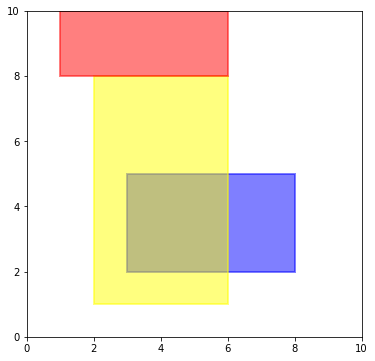

In [2]:
#EXAMPLE TO SHOW FUNCTIONALITY

fig, ax = plt.subplots(1,figsize=(6,6))
a = Tower(ax)
a.set_xy(3,5,8,2)
b = Tower(ax)
b.set_xy(2,8,6,1)
c = Tower(ax)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.show()

## The Region Class

While serving as our playing field, the region class will also perform the operations and checks necessary to keep the game going. Let's think about what the rules of this game will be:

1) Playing field size will be user-specified but have a default

2) It should be able to create a user-specified number of towers

3) It should be able to detect when an overlap occurs

4) When the overlap is detected, it will 'trim' the newest tower so that it retains the most amount of area it can while not overlapping anything else.

### Detecting An Overlap

The study of overlapping rectangles reveals a certain phenomenon. Given any rectangles A and B, any one of four conditions guarantees that no overlap can exist:

Condition 1: If A's left edge is to the right of the B's right edge, then A is entirely to right of B

Condition 2: If A's right edge is to the left of the B's left edge, then A is entirely to left of B

Condition 3: If A's top edge is below B's bottom edge, then A is entirely below B

Condition 4: If A's bottom edge is above B's top edge, then A is entirely above B

Therefore (1) or (2) or (3) or (4) will guarantee that there is no overlap. 


Since we need to detect an overlap, basic logic reveals that we need to compute NOT(1 or 2 or 3 or 4).
Applying DeMorgan's Rule, NOT(1 or 2 or 3 or 4) = NOT 1 and NOT 2 and NOT 3 and NOT 4.

If we think of the left and right edge as the x-coordinate of the left and right corner, and the top and bottom as the y-coordinate of the top and bottom corner, it is easy to translate these conditions into if statements using our Tower's parameters.

NOT 1 equates to the A.x2 < B.x4, NOT 2 equates to A.x4 > B.x2, etc.

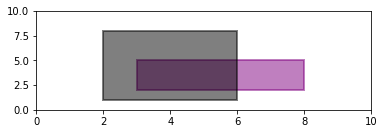

Overlap!


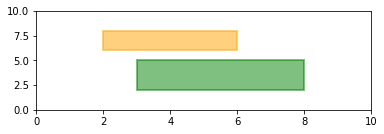

No Overlap!


In [3]:
#EXAMPLE TO DEMONSTRATE OVERLAP FUNCTION
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import itertools



def detect_Overlap(tower1,tower2):
    """
    detects if two towers intersect
    :param: tower1
    :type: Tower
    :param: tower2
    :type: Tower
    
    """
    if tower1.x2 < tower2.x4 and tower1.x4 > tower2.x2 \
    and tower1.y4 < tower2.y2 and tower1.y2 > tower2.y4:
        return True
    else:
        return False
   



ax1 = plt.subplot(211)
a = Tower(ax1)
a.set_x2(3)
a.set_y2(5)
a.set_x4(8)
a.set_y4(2)
b = Tower(ax1)
b.set_x2(2)
b.set_y2(8)
b.set_x4(6)
b.set_y4(1)
ax1.set_xlim(0,10)
ax1.set_ylim(0,10)
plt.show()
if detect_Overlap(a,b) is True:
    print 'Overlap!'
else:
    print 'No Overlap!'
    
    
ax2 = plt.subplot(212)
c = Tower(ax2)
c.set_x2(3)
c.set_y2(5)
c.set_x4(8)
c.set_y4(2)
d = Tower(ax2)
d.set_x2(2)
d.set_y2(8)
d.set_x4(6)
d.set_y4(6)
ax2.set_xlim(0,10)
ax2.set_ylim(0,10)
plt.show()
if detect_Overlap(c,d) is True:
    print 'Overlap!'
else:
    print 'No Overlap!'

plt.show()

### Trimming

This is the hard part. Let's detail exactly what the trimming function should do:

1) Find out which direction of the non-overlapped rectangle has the most area (up, down, left, right)

2) Move the overlapped corner(s) of the rectangle in that direction until is not overlapped anymore

It may be helpful to note that we can simply move an edge out of overlap by placing it where the underlying rectangle edge is, i.e.

    ooooooooooooooooo                   Set o edge to u edge     ooooooooooooo     
                uuuuuuuuuuuuuuuuuuuu                                         uuuuuuuuuuuuuuuuuuuu
    1           2           3                                    1           2           3

Assessing all the possible non-overlapped areas using if-statements is not very practical. We can use dictionaries to do the heavy-lifting for us.

We can think of an area that is not overlapped as the difference between the -coordinates of the rectangles and the opposing dimension, i.e.

Assume x is the overlapping rectangle:

        xxxxxxxxxxx   4     
        x         x                       area right :  (x3 - x2) * height
    oooooooo      x   3
    o   x  o      x                       area up : (y4 - y3) * width
    o   xxxoxxxxxxx   2
    o      o
    oooooooo          1  
    
    1      2      3
    

So if we use a dictionary to store each of dimension's area values, we can find the key with the maximum value! This will lead us to the appropriate dimension. However, if all the values are the same we can be in trouble, so we must make sure that any trimming movements are legal, i.e. we're not moving the bottom right coordinate over the top left, and that the trimming removes the overlap. If not, we must return the rectangle to its original state and try another dimension. Our trimming function may look something like this:

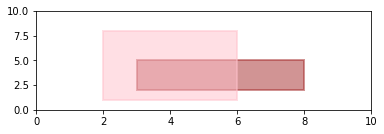

Overlap!


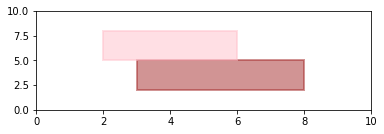

No Overlap!


In [4]:
#EXAMPLE TO DEMONSTRATE TRIMMING
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import itertools

def trim_Tower(tower1,tower2):
    """
    trims tower2 down wrt tower1
    :param: tower1
    :type: Tower
    :param: tower2
    :type: Tower
    
    """
    
    #if entirely contained, destroy tower
    if tower2.x2 >= tower1.x2 and tower2.x4 <= tower1.x4 and tower2.y2 <= tower1.y2 and tower2.y4 >= tower1.y4:
        tower2.set_x2(0)
        tower2.set_x4(0)
        tower2.set_y2(0)
        tower2.set_y4(0)
        
    #dictionary to contain area values   
    overlaps = {'x2':0,'x4':0,'y2':0,'y4':0}
    overlaps['x2'] = abs(tower2.x2 - tower1.x2)*(tower2.height)
    overlaps['x4'] = abs(tower2.x4 - tower1.x4)*(tower2.height)
    overlaps['y2'] = abs(tower2.y2 - tower1.y2)*(tower2.width)
    overlaps['y4'] = abs(tower2.y4 - tower1.y4)*(tower2.width)
    
    #loop until overlap is gone
    while detect_Overlap(tower1,tower2) == True:
        sel = max(overlaps, key=overlaps.get)
        if sel == 'x2':               
            place = tower2.x4  #hold value, incase its wrong
            if tower1.x2 > tower2.x2:
                tower2.set_x4(tower1.x2) #trim
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_x4(place) #put back rectangle, try again 
                overlaps.pop('x2', None) #remove faulty dimension
                sel = max(overlaps, key=overlaps.get)

        if sel == 'x4':
            place = tower2.x2
            if tower1.x4 < tower2.x4:
                tower2.set_x2(tower1.x4)
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_x2(place)
                overlaps.pop('x4',None)
                sel = max(overlaps, key=overlaps.get)

        if sel == 'y2':
            place = tower2.y4
            if tower1.y2 < tower2.y2:
                tower2.set_y4(tower1.y2)
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_y4(place)
                overlaps.pop('y2',None)
                sel = max(overlaps, key=overlaps.get)


        if sel == 'y4':
            place = tower2.y2
            if tower1.y4 > tower2.y4:
                tower2.set_y2(tower1.y4)
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_y2(place)
                overlaps.pop('y4',None)
                sel = max(overlaps, key=overlaps.get)


def detect_Overlap(tower1,tower2):
    """
    detects if two towers intersect
    :param: tower1
    :type: Tower
    :param: tower2
    :type: Tower
    
    """
    if tower1.x2 < tower2.x4 and tower1.x4 > tower2.x2 \
    and tower1.y4 < tower2.y2 and tower1.y2 > tower2.y4:
        return True
    else:
        return False
   



ax1 = plt.subplot(211)
a = Tower(ax1)
a.set_xy(3,5,8,2)
b = Tower(ax1)
b.set_xy(2,8,6,1)
ax1.set_xlim(0,10)
ax1.set_ylim(0,10)
plt.show()
if detect_Overlap(a,b) is True:
    print 'Overlap!'
else:
    print 'No Overlap!'
    
    
ax2 = plt.subplot(212)
#make two towers with same dimensions as previous
c = Tower(ax2)
c.copy(a)
d = Tower(ax2)
d.copy(b)
ax2.set_xlim(0,10)
ax2.set_ylim(0,10)
if detect_Overlap(c,d) is True:
    trim_Tower(c,d)
    
plt.show()

if detect_Overlap(c,d) is True:  
    print 'Overlap!'
else:
    print 'No Overlap!'



We're now ready to define our region class. Besides the overlap detector and trimming function, we're also going to need functions that will visualize exactly how our function works, and functions that will help answer our client's questions. Let's review them.

1) Initialize: Initialize a region with a user-specified desired coverage.

2) Detect Overlap: Detect overlaps when they occur.

3) Trim: Trim tower with respect to the previous tower.

4) Visualize: Drop a Tower, observe, drop another tower, observe, trim down, observe, drop another tower, etc.

5) Populate: Given a number n, populate the region with n towers and trim when needed. Find the resulting coverage, and total amount of gap between resulting coverage and desired coverage.

6) Cover: Populate the region until total resulting coverage is equal to desired coverage, saving number of towers needed to do so. Repeat 10 times, take average of number of towers.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import itertools

class Region(object):
    def __init__(self,w_cov=10,h_cov=10):
        """
        initializes region
        :param: h_cov, height of the coverage area
        :type: int
        :param: w_cov, width of the coverage area
        :type: int
        
        """
        assert isinstance(h_cov,int)
        assert isinstance(w_cov,int)
        self.h = h_cov
        self.w = w_cov
        self.area = h_cov*w_cov

        
    def detect_Overlap(self,tower1,tower2):
        """
        detects if two towers intersect
        :param: tower1
        :type: Tower Object
        :param: tower2
        :type: Tower Object

        """
        if tower1.x2 < tower2.x4 and tower1.x4 > tower2.x2 \
        and tower1.y4 < tower2.y2 and tower1.y2 > tower2.y4:
            return True
        else:
            return False
    
    
    def trim_Tower(self,tower1,tower2):
        """
        trims tower2 down wrt tower1
        :param: tower1
        :type: Tower
        :param: tower2
        :type: Tower

        """

        #if entirely contained, destroy tower
        if tower2.x2 >= tower1.x2 and tower2.x4 <= tower1.x4 and tower2.y2 <= tower1.y2 and tower2.y4 >= tower1.y4:
            tower2.set_x2(0)
            tower2.set_x4(0)
            tower2.set_y2(0)
            tower2.set_y4(0)
            
        #dictionary to contain area values    
        overlaps = {'x2':0,'x4':0,'y2':0,'y4':0}
        overlaps['x2'] = abs(tower2.x2 - tower1.x2)*(tower2.height)
        overlaps['x4'] = abs(tower2.x4 - tower1.x4)*(tower2.height)
        overlaps['y2'] = abs(tower2.y2 - tower1.y2)*(tower2.width)
        overlaps['y4'] = abs(tower2.y4 - tower1.y4)*(tower2.width)

        #loop until overlap is gone
        while self.detect_Overlap(tower1,tower2) == True: 
            sel = max(overlaps, key=overlaps.get) #find max area dimension
            
            if sel == 'x2':               
                place = tower2.x4 #keep incase wrong
                if tower1.x2 > tower2.x2: #check if legal
                    tower2.set_x4(tower1.x2) #trim
                if self.detect_Overlap(tower1,tower2) == True: #if wrong
                    tower2.set_x4(place) #return to normal
                    d = overlaps.pop('x2', None) #kick out wrong answer
                    sel = max(overlaps, key=overlaps.get) #try again

            if sel == 'x4':
                place = tower2.x2
                if tower1.x4 < tower2.x4:
                    tower2.set_x2(tower1.x4)
                if self.detect_Overlap(tower1,tower2) == True:
                    tower2.set_x2(place)
                    d = overlaps.pop('x4',None)
                    sel = max(overlaps, key=overlaps.get)

            if sel == 'y2':
                place = tower2.y4
                if tower1.y2 < tower2.y2:
                    tower2.set_y4(tower1.y2)
                if self.detect_Overlap(tower1,tower2) == True:
                    tower2.set_y4(place)
                    d = overlaps.pop('y2',None)
                    sel = max(overlaps, key=overlaps.get)


            if sel == 'y4':
                place = tower2.y2
                if tower1.y4 > tower2.y4:
                    tower2.set_y2(tower1.y4)
                if self.detect_Overlap(tower1,tower2) == True:
                    tower2.set_y2(place)
                    d = overlaps.pop('y4',None)
                    sel = max(overlaps, key=overlaps.get)   
                    
    def populate(self,n,out='on'):
        """
        populate the region with n towers
        
        """
        assert isinstance(n,int)
        self.fig, self.ax = plt.subplots(1,figsize=(6,6))
        self.ax.set_xlim(0,self.w)
        self.ax.set_ylim(0,self.h)
        result = 0
        towers = []
        for i in xrange(0,n):
            a = Tower(self.ax,self.w,self.h)
            towers.append(a)
            for j in xrange(0,len(towers)-1):
                if self.detect_Overlap(towers[j],a) is True:
                    self.trim_Tower(towers[j],a)
        for k in xrange(0,len(towers)):
            result = result + towers[k].area
        if out == 'on':
            print 'No. of Towers: %d, Total Desired Coverage: %d, Total Resulting Coverage: %d, Total Unresolved Coverage: %d' %(n,self.area,result,self.area - result)
        return self.area - result 
            
    def visualize(self,n):
        """
        populate region with n towers, visualizing each tower being placed
        and trimmed
        :param: n
        :type: int
        
        
        """
        towers = []
        for i in xrange(0,n):
            fig, ax = plt.subplots(1,figsize=(3,3))
            ax.set_xlim(0,10)
            ax.set_ylim(0,10)
            a = Tower(ax)
            towers.append(a)
            for k in xrange(0,len(towers)-1):
                b = Tower(ax)
                b.copy(towers[k])
            plt.show()
            for k in xrange(0,len(towers)-1):
                if detect_Overlap(towers[k],a) is True:
                    trim_Tower(towers[k],a)
                    plt.show()
        plt.show()       
            
    def cover(self):
        """
        populate region until unresolved coverage = 0
        
        """
        i = [0,0,0,0,0,0,0,0,0,0]
        for j in xrange(0,10):
            unres = 100
            i[j] = 1
            while unres != 0:
                unres = self.populate(i[j],'off')
                plt.close('all')
                plt.ioff() 
                i[j] = i[j]+1

        print 'Average number of towers needed to cover area of %d: %d' %(self.area,(np.mean(i)))      
        plt.close('all')
        return int(np.mean(i)) 
            
            
            

First, let's visualize our classes in action.

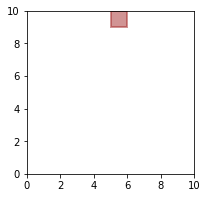

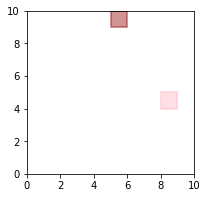

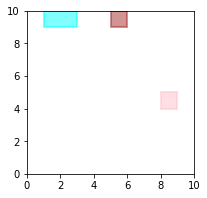

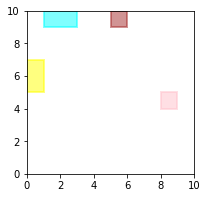

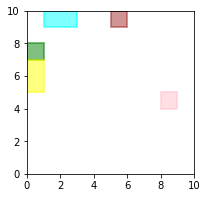

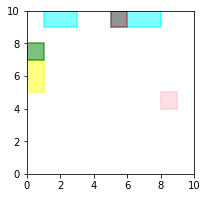

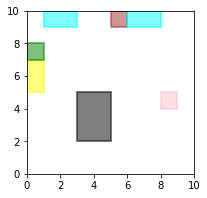

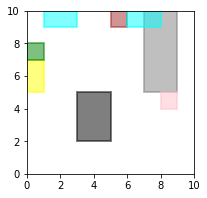

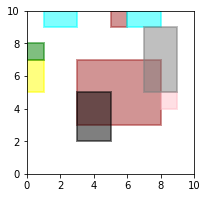

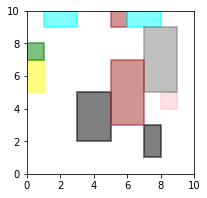

In [39]:
coverage = Region(5,5)
coverage.visualize(10)

Now, let's see what the total unresolved coverage is for a specified area, given 'n' towers.

No. of Towers: 10, Total Desired Coverage: 25, Total Resulting Coverage: 17, Total Unresolved Coverage: 8


8

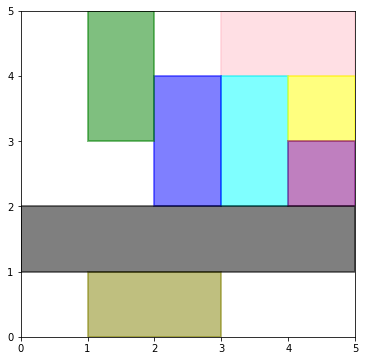

In [41]:
coverage = Region(5,5)
coverage.populate(10)

Now let's see how many towers it takes to cover a specified area.

In [43]:
coverage = Region(6,5)
coverage.cover()
coverage = Region(2,2)
coverage.cover()
coverage = Region(8,8)
coverage.cover()

Average number of towers needed to cover area of 30: 25
Average number of towers needed to cover area of 4: 5
Average number of towers needed to cover area of 64: 59


59

From the above, we can see that if we need to cover an area of n, we need roughly n towers to do so.